In [64]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [65]:

df = pd.read_csv("Resources\Telco_Customer_Churn_Cleaned.csv")

In [66]:
df.drop(columns = 'Unnamed: 0', inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

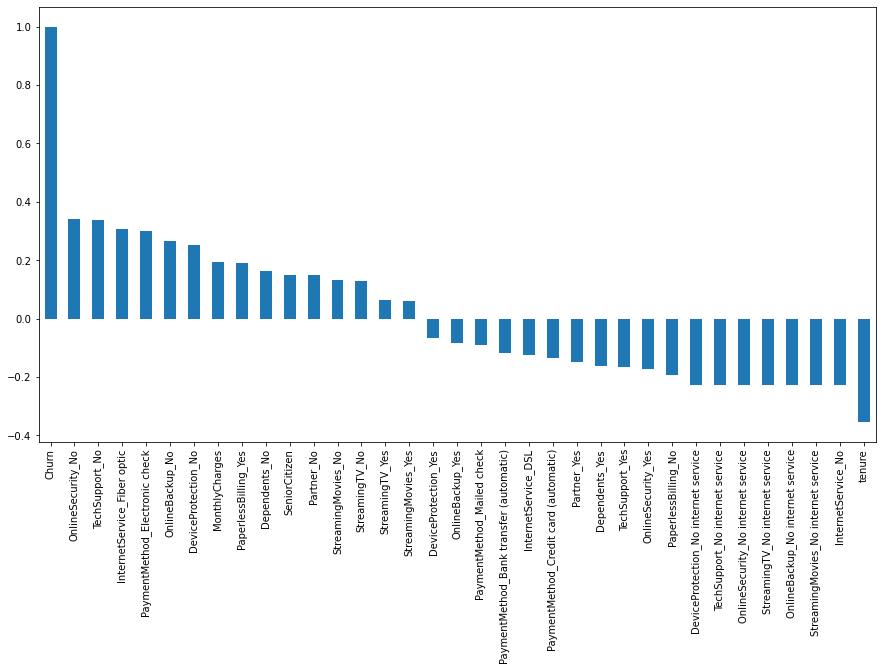

In [67]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [68]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [69]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'InternetService','OnlineSecurity' , 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b
X

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.464789,0.385075,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.014085,0.354229,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.619718,0.239303,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.014085,0.521891,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0,0,1,1,0,0,0,1,...,0,1,0,1,0,1,1,0,0,1
7028,1.000000,0.845274,0,0,1,1,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
7029,0.140845,0.112935,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7030,0.042254,0.558706,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Text(0.5, 1.0, 'Class Distribution Before Resampling')

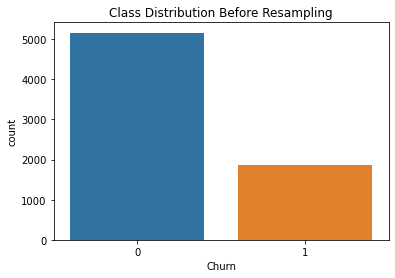

In [70]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [71]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))
5174

5163


5174

Text(0.5, 1.0, 'Class Distribution After Resampling')

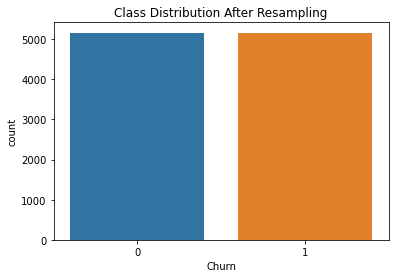

In [72]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [73]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)